In [1]:
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
from ipywidgets import interact
import shutil
import random
import string

Coletando os caminhos para cada arquivo DICOM na pasta de tomografia.

In [2]:
pasta_raiz_da_tomografia = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/'
lista_caminhos_arquivos_dicom = [os.path.join(pasta_raiz_da_tomografia, arquivo) for arquivo in os.listdir(pasta_raiz_da_tomografia) if arquivo.endswith('.dcm')]

Como podemos ver, estão desordenados:

In [3]:
lista_caminhos_arquivos_dicom

['/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-113.dcm',
 '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-198.dcm',
 '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-139.dcm',
 '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-224.dcm',
 '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-255.dcm',
 '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-213.dcm',
 '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/01-01-2000-NA-NA-98329/3000522.000000-NA-04919/1-03

Plotando a tomografia:

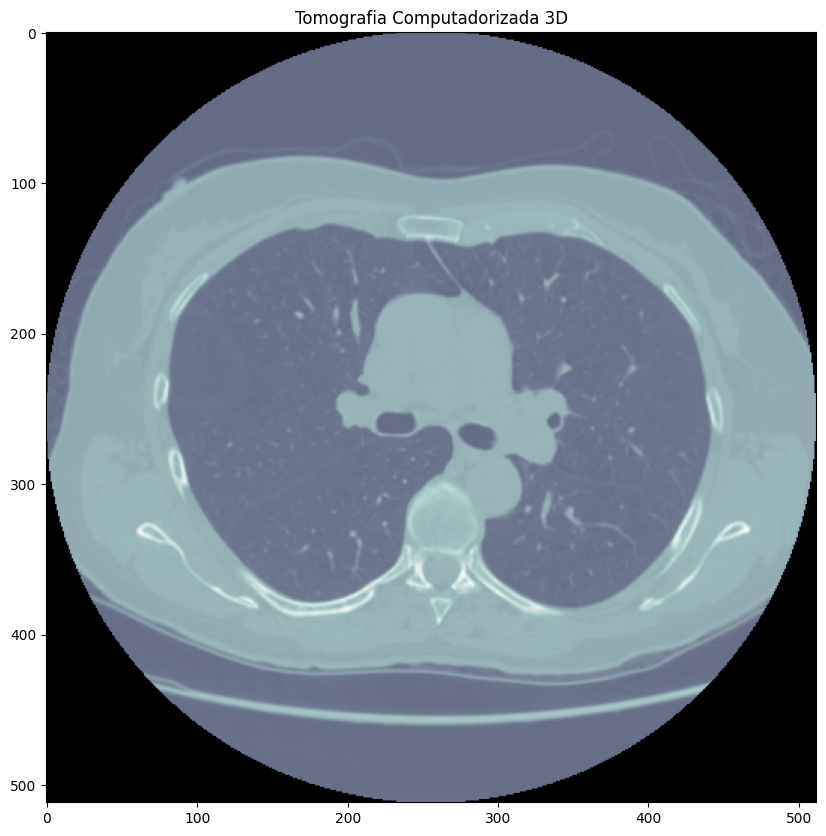

In [4]:
volume_3d = np.stack([pydicom.dcmread(arquivo).pixel_array for arquivo in lista_caminhos_arquivos_dicom])

plt.figure(figsize=(10, 10))
plt.imshow(volume_3d[0, :, :], cmap=plt.cm.bone)
plt.title("Tomografia Computadorizada 3D")
plt.show()

<b>def visualizar_tomografia(corte)</b>

Exibe uma imagem de tomografia correspondente a um corte específico.

<p>- param @ caminhos_arquivos_dicom (list): Uma lista de caminhos para os arquivos DICOM.
<p>- param @ corte (int): O índice do corte a ser exibido.

<p>Esta função permite a visualização de uma imagem de tomografia específica com base no índice de corte fornecido.



In [5]:
def visualizar_tomografia(caminhos_arquivos_dicom, corte):
    ds = pydicom.dcmread(caminhos_arquivos_dicom[corte])
    pixel_array = ds.pixel_array

    plt.figure(figsize=(8, 8))
    plt.imshow(pixel_array, cmap=plt.cm.bone)
    plt.title(f"Tomografia - Corte {corte}")
    plt.show()

Mostrando os cortes da pasta, desordenados

<p> - Nenhum sort ou algoritmo para ordenação por Instance Number foi aplicado. 

<p> A pasta que está sendo visualizada é a <b>pasta original.</b>
<p> Até este ponto, nenhum arquivo foi renomeado, copiado ou ordenado para outra pasta.

In [6]:
interact(lambda corte: visualizar_tomografia(lista_caminhos_arquivos_dicom, corte), corte=(0, len(lista_caminhos_arquivos_dicom)-1))

interactive(children=(IntSlider(value=130, description='corte', max=260), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>(corte)>

<p> Caso quiséssemos ordenar por número (do título do arquivo) neste caso
<p> seria válido pois os arquivos são nomeados de acordo com sua ordem.
<p> Apenas usariamos a função sort(), como no exemplo abaixo:

In [7]:
#lista_caminhos_arquivos_dicom.sort()

<h1>Ordenando por Instance Number</h1>

Nosso intuito é aprender como ordenar quando não conseguirmos ordená-los por nome.

<p> Para isso, vamos copiar os arquivos para uma pasta teste e renomea-los aleatóriamente...

<b>def criar_ou_substituir_pasta(caminho_da_pasta)</b>

<p>Cria uma pasta vazia ou substitui uma pasta existente no caminho fornecido.
<p>Obs: Essa função foi criada para que não precisemos manualmente realizar esa remoção e criação de pastas.

<p> - param @ caminho_da_pasta (str): O caminho da pasta que será criada ou substituída.


In [8]:
def criar_ou_substituir_pasta(caminho_da_pasta):
    if os.path.exists(caminho_da_pasta):
        # Se a pasta já existe, apaga a pasta existente
        shutil.rmtree(caminho_da_pasta)

    # Cria uma nova pasta vazia no mesmo caminho
    os.mkdir(caminho_da_pasta)

In [9]:
pasta_teste = '/A/motomed/radiomics/data/download/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0002/teste'
criar_ou_substituir_pasta(pasta_teste)

<h1> Pasta teste criada. Agora iremos copiar<br>
e renomear os arquivos aleatoriamente.</h1>

<b>def copiar_arquivos_para_outra_pasta(pasta_fonte, pasta_destino)</b>

Copia arquivos da pasta de origem para a pasta de destino.

<p>- param @ pasta_fonte (str): O caminho da pasta de origem.
<p>- param @ pasta_destino (str): O caminho da pasta de destino.

Exemplo:
copiar_arquivos_para_outra_pasta('/caminho/para/pasta_origem', '/caminho/para/pasta_destino')

In [10]:
def copiar_arquivos_para_outra_pasta(pasta_fonte, pasta_destino):
    arquivos = os.listdir(pasta_fonte)
    

    random.shuffle(arquivos) #ordem aleatoria.
    
    for arquivo in arquivos:
        arquivo_fonte = os.path.join(pasta_fonte, arquivo)
        arquivo_destino = os.path.join(pasta_destino, arquivo)
        
        shutil.copy(arquivo_fonte, arquivo_destino)
        print(f"Arquivo copiado: {arquivo}")

In [11]:
copiar_arquivos_para_outra_pasta(pasta_raiz_da_tomografia, pasta_teste)

Arquivo copiado: 1-075.dcm
Arquivo copiado: 1-118.dcm
Arquivo copiado: 1-037.dcm
Arquivo copiado: 1-242.dcm
Arquivo copiado: 1-239.dcm
Arquivo copiado: 1-253.dcm
Arquivo copiado: 1-033.dcm
Arquivo copiado: 1-101.dcm
Arquivo copiado: 1-214.dcm
Arquivo copiado: 1-127.dcm
Arquivo copiado: 1-031.dcm
Arquivo copiado: 1-013.dcm
Arquivo copiado: 1-002.dcm
Arquivo copiado: 1-005.dcm
Arquivo copiado: 1-197.dcm
Arquivo copiado: 1-227.dcm
Arquivo copiado: 1-192.dcm
Arquivo copiado: 1-178.dcm
Arquivo copiado: 1-176.dcm
Arquivo copiado: 1-020.dcm
Arquivo copiado: 1-035.dcm
Arquivo copiado: 1-249.dcm
Arquivo copiado: 1-072.dcm
Arquivo copiado: 1-017.dcm
Arquivo copiado: 1-223.dcm
Arquivo copiado: 1-156.dcm
Arquivo copiado: 1-064.dcm
Arquivo copiado: 1-149.dcm
Arquivo copiado: 1-034.dcm
Arquivo copiado: 1-085.dcm
Arquivo copiado: 1-097.dcm
Arquivo copiado: 1-106.dcm
Arquivo copiado: 1-153.dcm
Arquivo copiado: 1-134.dcm
Arquivo copiado: 1-158.dcm
Arquivo copiado: 1-252.dcm
Arquivo copiado: 1-113.dcm
A


<b>def renomear_arquivos_dicom_com_nomes_aleatorios(pasta_fonte)</b>

Renomeia arquivos DICOM de uma pasta com nomes aleatórios.

<p>- param @ pasta_fonte (str): pasta com caminhos dos arquivos a serem renomeados.

Exemplo:
renomear_arquivos_dicom_com_nomes_aleatorios('/caminho/para/pasta_origem')

In [12]:
def renomear_arquivos_dicom_com_nomes_aleatorios(pasta_fonte):
    
    arquivos = os.listdir(pasta_fonte)

    random.shuffle(arquivos)

    for nome_arquivo_antigo in arquivos:
        caminho_arquivo_antigo = os.path.join(pasta_fonte, nome_arquivo_antigo)

        if nome_arquivo_antigo.lower().endswith('.dcm'):
            novo_nome_arquivo = ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(8)) + '.dcm'
            caminho_arquivo_novo = os.path.join(pasta_fonte, novo_nome_arquivo)
            shutil.move(caminho_arquivo_antigo, caminho_arquivo_novo)
        else:
            print(f"Arquivo não DICOM: {nome_arquivo_antigo}")


In [13]:
renomear_arquivos_dicom_com_nomes_aleatorios(pasta_teste)

Arquivo não DICOM: 071.xml


Printando os Instance Numbers para ter certeza de que está desordenado:

<b>def print_instance_numbers(folder_path)</b>

<p>Imprime Instance Numbers de arquivos DICOM em uma pasta ou lista de caminhos.

<p>Esta função aceita uma pasta de origem ou uma lista de caminhos de arquivos DICOM.
<p>Para cada arquivo DICOM na pasta ou na lista de caminhos, ela imprime o nome do arquivo e seu Instance Number.

<p> - param @ pasta_fonte_ou_lista (str ou list): O caminho da pasta contendo arquivos DICOM ou uma lista de caminhos.

In [14]:
def print_instance_numbers(pasta_fonte_ou_lista):
    if isinstance(pasta_fonte_ou_lista, str):
        # Se o argumento for uma string (caminho da pasta), processa como uma pasta.
        for nome_arquivo in os.listdir(pasta_fonte_ou_lista):
            caminho_arquivo = os.path.join(pasta_fonte_ou_lista, nome_arquivo)

            if nome_arquivo.lower().endswith('.dcm'):
                arquivo = pydicom.dcmread(caminho_arquivo)
                instance_number = arquivo.InstanceNumber
                print(f"Nome do arquivo: {nome_arquivo}, InstanceNumber: {instance_number}")
                
    elif isinstance(pasta_fonte_ou_lista, list):
        # Se o argumento for uma lista de caminhos, processa os caminhos diretamente.
        for caminho_arquivo in pasta_fonte_ou_lista:
            arquivo = pydicom.dcmread(caminho_arquivo)
            instance_number = arquivo.InstanceNumber
            print(f"Nome do arquivo: {os.path.basename(caminho_arquivo)}, InstanceNumber: {instance_number}")


In [15]:
print_instance_numbers(pasta_teste)

Nome do arquivo: 0oPnbfh7.dcm, InstanceNumber: 72
Nome do arquivo: dLmFyU8B.dcm, InstanceNumber: 174
Nome do arquivo: FSlXiw0M.dcm, InstanceNumber: 177
Nome do arquivo: AJP13DlS.dcm, InstanceNumber: 100
Nome do arquivo: 5eODH46x.dcm, InstanceNumber: 254
Nome do arquivo: 8UjsuWhZ.dcm, InstanceNumber: 77
Nome do arquivo: cfdacaRn.dcm, InstanceNumber: 156
Nome do arquivo: JHv2znke.dcm, InstanceNumber: 101
Nome do arquivo: Lbd850vk.dcm, InstanceNumber: 150
Nome do arquivo: eIz5mE44.dcm, InstanceNumber: 201
Nome do arquivo: HHmfWeZe.dcm, InstanceNumber: 35
Nome do arquivo: J8lQ0wSC.dcm, InstanceNumber: 19
Nome do arquivo: rMD65lFK.dcm, InstanceNumber: 104
Nome do arquivo: wKNXwxgn.dcm, InstanceNumber: 218
Nome do arquivo: e0PJE5H3.dcm, InstanceNumber: 219
Nome do arquivo: mp9jv9Hq.dcm, InstanceNumber: 228
Nome do arquivo: XB8HmXzJ.dcm, InstanceNumber: 166
Nome do arquivo: 9w4eVnTH.dcm, InstanceNumber: 47
Nome do arquivo: Hl7tiDTl.dcm, InstanceNumber: 132
Nome do arquivo: dXTnasKS.dcm, Insta

<h1>Dado que os cortes da tomografia continuam desordenados,<br>
construiremos um algoritmo para ordena-los por Instance Number.</h1>

In [16]:
lista_caminhos_arquivos_dicom_da_pasta_teste = [os.path.join(pasta_teste, arquivo) for arquivo in os.listdir(pasta_teste) if arquivo.endswith('.dcm')]

<h1>Antes de ordenar:</h1>

In [17]:
interact(lambda corte: visualizar_tomografia(lista_caminhos_arquivos_dicom_da_pasta_teste, corte), corte=(0, len(lista_caminhos_arquivos_dicom_da_pasta_teste)-1))

interactive(children=(IntSlider(value=130, description='corte', max=260), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>(corte)>

In [18]:
print_instance_numbers(lista_caminhos_arquivos_dicom_da_pasta_teste)

Nome do arquivo: 0oPnbfh7.dcm, InstanceNumber: 72
Nome do arquivo: dLmFyU8B.dcm, InstanceNumber: 174
Nome do arquivo: FSlXiw0M.dcm, InstanceNumber: 177
Nome do arquivo: AJP13DlS.dcm, InstanceNumber: 100
Nome do arquivo: 5eODH46x.dcm, InstanceNumber: 254
Nome do arquivo: 8UjsuWhZ.dcm, InstanceNumber: 77
Nome do arquivo: cfdacaRn.dcm, InstanceNumber: 156
Nome do arquivo: JHv2znke.dcm, InstanceNumber: 101
Nome do arquivo: Lbd850vk.dcm, InstanceNumber: 150
Nome do arquivo: eIz5mE44.dcm, InstanceNumber: 201
Nome do arquivo: HHmfWeZe.dcm, InstanceNumber: 35
Nome do arquivo: J8lQ0wSC.dcm, InstanceNumber: 19
Nome do arquivo: rMD65lFK.dcm, InstanceNumber: 104
Nome do arquivo: wKNXwxgn.dcm, InstanceNumber: 218
Nome do arquivo: e0PJE5H3.dcm, InstanceNumber: 219
Nome do arquivo: mp9jv9Hq.dcm, InstanceNumber: 228
Nome do arquivo: XB8HmXzJ.dcm, InstanceNumber: 166
Nome do arquivo: 9w4eVnTH.dcm, InstanceNumber: 47
Nome do arquivo: Hl7tiDTl.dcm, InstanceNumber: 132
Nome do arquivo: dXTnasKS.dcm, Insta

<h1>Ordenando:</h1>

<b>def sort_by_instance_number(caminho_da_pasta)</b>

<p> Ordena arquivos DICOM por número de instância em uma pasta.

<p> - param @ caminho_da_pasta (str): O caminho da pasta contendo os arquivos DICOM.

In [19]:
def sort_by_instance_number(caminho_da_pasta):
    arquivos_dicom = [os.path.join(caminho_da_pasta, arquivo) for arquivo in os.listdir(caminho_da_pasta) if arquivo.endswith('.dcm')]
    
    def obter_numero_de_instancia(caminho_arquivo):
        dicom_data = pydicom.dcmread(caminho_arquivo)
        instance_number = int(dicom_data.InstanceNumber)
        return instance_number

    arquivos_dicom = sorted(arquivos_dicom, key=obter_numero_de_instancia)
    
    return arquivos_dicom

In [20]:
lista_caminhos_arquivos_dicom_da_pasta_teste = sort_by_instance_number(pasta_teste)

In [21]:
interact(lambda corte: visualizar_tomografia(lista_caminhos_arquivos_dicom_da_pasta_teste, corte), corte=(0, len(lista_caminhos_arquivos_dicom_da_pasta_teste)-1))

interactive(children=(IntSlider(value=130, description='corte', max=260), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>(corte)>

In [22]:
print_instance_numbers(lista_caminhos_arquivos_dicom_da_pasta_teste)

Nome do arquivo: rSKH2doi.dcm, InstanceNumber: 1
Nome do arquivo: Je58dOXq.dcm, InstanceNumber: 2
Nome do arquivo: kFYkPwv6.dcm, InstanceNumber: 3
Nome do arquivo: osOpDPn5.dcm, InstanceNumber: 4
Nome do arquivo: IAqcwrOC.dcm, InstanceNumber: 5
Nome do arquivo: t4eDVN4E.dcm, InstanceNumber: 6
Nome do arquivo: oKeUJ3LQ.dcm, InstanceNumber: 7
Nome do arquivo: gbgClp35.dcm, InstanceNumber: 8
Nome do arquivo: K0Qhfjac.dcm, InstanceNumber: 9
Nome do arquivo: vhNMhxUW.dcm, InstanceNumber: 10
Nome do arquivo: WZiTwB8L.dcm, InstanceNumber: 11
Nome do arquivo: ae2OZfv8.dcm, InstanceNumber: 12
Nome do arquivo: osRmXUZi.dcm, InstanceNumber: 13
Nome do arquivo: uqWar1Ud.dcm, InstanceNumber: 14
Nome do arquivo: No2lcrAn.dcm, InstanceNumber: 15
Nome do arquivo: KPCkTh0q.dcm, InstanceNumber: 16
Nome do arquivo: TDnpOfDM.dcm, InstanceNumber: 17
Nome do arquivo: d7aiHRX8.dcm, InstanceNumber: 18
Nome do arquivo: J8lQ0wSC.dcm, InstanceNumber: 19
Nome do arquivo: HffIdA75.dcm, InstanceNumber: 20
Nome do a